In [1]:
# Use the following data for this assignment:
%matplotlib notebook
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

np.random.seed(12345)

df = pd.DataFrame({1992:np.random.normal(32000,200000,3650), 
                   1993:np.random.normal(43000,100000,3650), 
                   1994:np.random.normal(43500,140000,3650), 
                   1995:np.random.normal(48000,70000,3650)})

intervals = [st.norm.interval(alpha=0.95, loc=np.mean(df[1992]), scale=st.sem(df[1992])),
             st.norm.interval(alpha=0.95, loc=np.mean(df[1993]), scale=st.sem(df[1993])),
            st.norm.interval(alpha=0.95, loc=np.mean(df[1994]), scale=st.sem(df[1994])),
            st.norm.interval(alpha=0.95, loc=np.mean(df[1995]), scale=st.sem(df[1995]))]

<IPython.core.display.Javascript object>


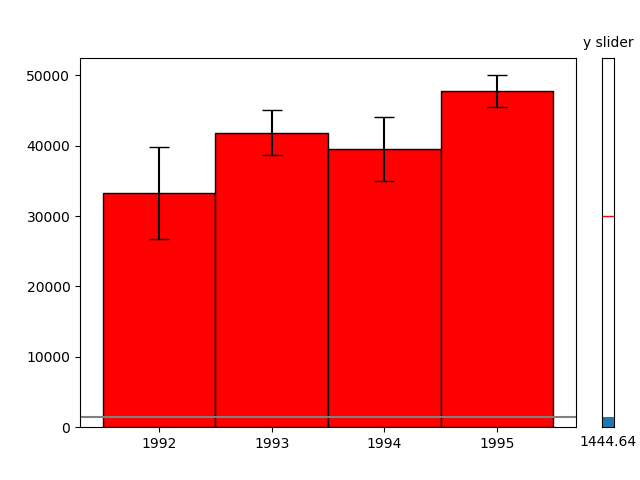

0

In [2]:
fig = plt.figure()

def GradColor(y, meanhist, inter):
    if y > inter[0] and y < inter[1]:
        coeff = 5
    else:
        coeff = 15
    blue = max(min(1,1+coeff*(y-meanhist)/y),0)
    red = max(min(1,1-coeff*(y-meanhist)/y),0)
    if y >= meanhist:
        green = max(min(1,1-coeff*(y-meanhist)/y),0)
    else:
        green = max(min(1,1-coeff*(meanhist-y)/meanhist),0)
    return (red, green, blue)

# Creation horizontal line
y = 30000
line = plt.axhline(y, color="gray")

# Creation bars and interval error
barWidth = 1
bars = df.apply(np.mean)
bar_means = [bars[1992], bars[1993], bars[1994], bars[1995]]
yer = [bars[1992]-intervals[0][0], bars[1993]-intervals[1][0], bars[1994]-intervals[2][0], bars[1995]-intervals[3][0]]
bar = plt.bar(np.arange(4), bars, width = barWidth, yerr=yer, capsize=7, edgecolor="black", color = [GradColor(y, bar_means[0], intervals[0]),GradColor(y, bar_means[1], intervals[1]),GradColor(y, bar_means[2], intervals[2]),GradColor(y, bar_means[3], intervals[3])])

axes = plt.gca()

plt.xticks(np.arange(4), ['1992', '1993', '1994', '1995'])


# Creation slider
slidax = plt.axes([0.94, 0.11, 0.02, 0.77 ])
slid = Slider(slidax, 'y slider', axes.get_ylim()[0], axes.get_ylim()[1], valinit=y, orientation='vertical')

def update(val):
    amp = slid.val
    line.set_ydata(amp)
    for i in range(len(bar_means)):
        bar[i].set_color(GradColor(amp, bar_means[i], intervals[i]))
        bar[i].set_edgecolor("black")
    
    fig.canvas.draw_idle()

slid.on_changed(update)